In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import sklearn.preprocessing as prep
import math
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, metrics
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.model_selection import cross_validate

In [121]:
#pip install --upgrade pip

In [122]:
#pip install tensorflow==2.12.*

In [2]:
#Clear nulls in csv columns
def cleanNullTerms(d):
   clean = {}
   for k, v in d.items():
      if isinstance(v, dict):
         nested = cleanNullTerms(v)
         if len(nested.keys()) > 0:
            clean[k] = nested
      elif v is not None:
         clean[k] = v
   return clean

In [5]:
df=pd.read_csv('1985_accidents_cleaned.csv')
#Load lookup table
lookup = pd.read_csv("lookup_final.csv"  , low_memory=False)
df.head()
df_new=df.copy()

In [6]:
corr=df_new.corr()
abs(corr['accident_severity_encode']).sort_values()

first_road_number                                                                           0.002739
Week number                                                                                 0.002756
first_road_class_A                                                                          0.004488
police_force                                                                                0.004967
No pedestrian human control within 50 metres                                                0.005585
Control by school patrol or other authorised person                                         0.005585
road_surface_conditions_Flood over 3cm. deep                                                0.005601
road_surface_conditions_Other                                                               0.006496
road_type_Dual carriageway                                                                  0.006712
first_road_class_other                                                                     

In [7]:
#x=abs(corr['accident_severity_encode']).sort_values()
#for i in x:
 #   print (i.key())
df.drop(['first_road_number'], axis=1, inplace=True)
df.drop(['Week number'], axis=1, inplace=True)
df.drop(['first_road_class_A'], axis=1, inplace=True)
df.drop(['police_force'], axis=1, inplace=True)
df.drop(['No pedestrian human control within 50 metres'], axis=1, inplace=True)
df.drop(['Control by school patrol or other authorised person'], axis=1, inplace=True)
df.drop(['raining?'], axis=1, inplace=True)
df.drop(['daylight?'], axis=1, inplace=True)
#x.keys()
#list(x.items())[:4]

In [8]:
df.columns

Index(['location_easting_osgr', 'location_northing_osgr', 'number_of_vehicles',
       'number_of_casualties', 'day_of_week', 'local_authority_district',
       'speed_limit', 'accident_severity_encode', 'first_road_class_B',
       'first_road_class_Motorway', 'first_road_class_other',
       'road_type_Dual carriageway', 'road_type_Roundabout',
       'road_type_Single carriageway', 'road_type_other',
       'junction_detail_encode',
       'pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres',
       'pedestrian_crossing_physical_facilities_Physical Crossing Facilities Present',
       'light_conditions_encode', 'weather_conditions_encode',
       'road_surface_conditions_Dry',
       'road_surface_conditions_Flood over 3cm. deep',
       'road_surface_conditions_Other', 'road_surface_conditions_Wet or damp',
       'No Special Conditions', 'Special Conditions Present',
       'carriageway_hazards_None', 'carriageway_hazards_Present'],
      dtyp

In [9]:
df.drop(['road_type_other'], axis=1, inplace=True)
df.drop(['first_road_class_other'], axis=1, inplace=True)
df.drop(['road_surface_conditions_Other'], axis=1, inplace=True)
df.drop(['No Special Conditions'], axis=1, inplace=True)
df.drop(['carriageway_hazards_None'], axis=1, inplace=True)
df.drop(['pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres'], axis=1, inplace=True)
#df.drop(['No pedestrian human control within 50 metres'], axis=1, inplace=True)


In [10]:
df_new=df.copy()

In [11]:
lookup['accident_severity_encode'].dropna(inplace=True)
lookup['accident_severity'].dropna(inplace=True)
repl= lookup.set_index('accident_severity_encode')['accident_severity'].to_dict()#----->create a dictionary to map values
repl=cleanNullTerms(repl)
repl

{2.0: 'Slight',
 1.0: 'Serious',
 0.0: 'Fatal',
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: nan,
 nan: 

In [12]:
#Revert accident_severity column back to original labels
df['accident_severity']=df['accident_severity_encode'].replace(repl)
df['accident_severity'].head()

0    Slight
1    Slight
2    Slight
3    Slight
4    Slight
Name: accident_severity, dtype: object

In [13]:
df_new.columns.get_loc('accident_severity_encode')

7

In [14]:
len(df.columns)

23

In [15]:
x= df.iloc[:, :-1]
y= df.iloc[:, -1]
#x.head()
y.head()

0    Slight
1    Slight
2    Slight
3    Slight
4    Slight
Name: accident_severity, dtype: object

# Label --> accident_severity

In [16]:
df.head()

,location_easting_osgr,location_northing_osgr,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,speed_limit,accident_severity_encode,first_road_class_B,first_road_class_Motorway,...,junction_detail_encode,pedestrian_crossing_physical_facilities_Physical Crossing Facilities Present,light_conditions_encode,weather_conditions_encode,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Wet or damp,Special Conditions Present,carriageway_hazards_Present,accident_severity
0,0.560148,0.179868,0.000000,0.0,0.166667,0.967177,0.333333,2,0,0,...,0.084136,1,0.670667,0.747174,1,0,0,0,0,Slight
1,0.559979,0.180709,0.033333,0.0,0.000000,0.967177,0.333333,2,0,0,...,0.708190,1,0.225328,0.747174,1,0,0,0,0,Slight
2,0.558225,0.179958,0.033333,0.0,0.333333,0.967177,0.333333,2,0,0,...,0.039080,0,0.670667,0.747174,1,0,0,0,0,Slight
3,0.560380,0.180489,0.033333,0.0,0.000000,0.967177,0.333333,2,1,0,...,0.084136,0,0.670667,0.747174,0,0,1,0,0,Slight
4,0.560116,0.179888,0.000000,0.0,0.666667,0.967177,0.333333,2,0,0,...,0.708190,0,0.670667,0.747174,1,0,0,0,0,Slight


# KNN

In [17]:
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 500)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

#80% training set and 20% test set 
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 66794 samples 
test set size: 16699 samples


In [18]:
d1=pd.DataFrame(y_test)
d1.value_counts()

Slight     11859
Serious     4362
Fatal        478
dtype: int64

In [19]:
K=math.sqrt(len(x_train))
K

258.44535205725794

In [20]:
#To make k odd 
K=259

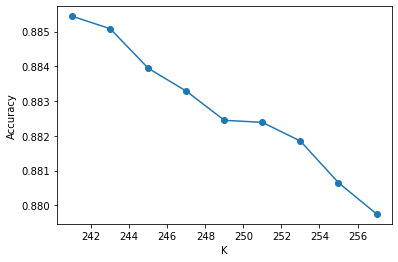

In [12]:
accuracy_list = []
list_K = list(range(241,259,2))
for K in list_K:
    knn=KNeighborsClassifier(K)
    knn.fit(x_train, y_train)
    y_pred= knn.predict(x_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
plt.plot(list_K,accuracy_list)
plt.scatter(list_K,accuracy_list)
plt.xlabel('K')
plt.ylabel('Accuracy');

In [21]:
knn = KNeighborsClassifier(K)
knn_scores = cross_val_score(knn, x_train, y_train, cv=5)
results = cross_validate(estimator=knn,
                               X=x_test,
                               y=y_test,
                               #cv=_cv,
                               #scoring=_scoring,
                               return_train_score=True)

In [22]:
results

{'fit_time': array([0.04709053, 0.05402899, 0.01404905, 0.02621174, 0.03123927]),
 'score_time': array([2.07804346, 2.24416447, 2.0630784 , 2.67183399, 2.26502991]),
 'test_score': array([0.96137725, 0.95808383, 0.95958084, 0.96077844, 0.96466008]),
 'train_score': array([0.9606258 , 0.96077551, 0.96189835, 0.95935325, 0.96115269])}

In [ ]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, y_pred)
knn_cm = confusion_matrix(y_test, y_pred)
knn_report = classification_report(y_test, )
#knn_roc = plot_roc_curve(knn, x_test, y_test, multi_class='ovr')
knn_confusion_matrix = plot_confusion_matrix(knn, x_test, y_test, normalize='true')

In [48]:
print(accuracy_score(y_test, y_pred))

0.9937720821606084


In [49]:
d1=pd.DataFrame(y_pred)
d1.value_counts()
#Fatal accidents were never correctly classified

Slight     11862
Serious     4460
Fatal        377
dtype: int64

# Naive Bayes

In [24]:
x= df.iloc[:, :-1]
y= df.iloc[:, -1]
#x.head()
#y.head()

In [25]:
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=520)
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, x_train, y_train, cv=5)
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 16699 points : 0


In [27]:
results = cross_validate(estimator=gnb,
                               X=x_test,
                               y=y_test,
                               #cv=_cv,
                               #scoring=_scoring,
                               return_train_score=True)
results

{'fit_time': array([0.04361463, 0.03193069, 0.03205967, 0.0473752 , 0.04225755]),
 'score_time': array([0.        , 0.01599717, 0.01745558, 0.        , 0.00902677]),
 'test_score': array([1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1.])}

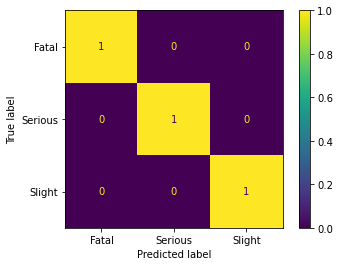

In [28]:
gnb_cm = confusion_matrix(y_test, y_pred)
gnb_report = classification_report(y_test, y_pred)
#gnb_roc = plot_roc_curve(gnb, x_test, y_test, multi_class='ovr')
gnb_confusion_matrix = plot_confusion_matrix(gnb, x_test, y_test, normalize='true')

In [29]:
#import sklearn.naive_bayes.MultinomialNB
from sklearn.naive_bayes import MultinomialNB

In [32]:
clf = MultinomialNB(alpha=1)
results = cross_validate(estimator=clf,
                               X=x_test,
                               y=y_test,
                               #cv=_cv,---> default is 5 K Fold
                               #scoring=_scoring,
                               return_train_score=True)


In [33]:
results

{'fit_time': array([0.12485647, 0.07715082, 0.0937233 , 0.11433721, 0.06993341]),
 'score_time': array([0.01596546, 0.01758242, 0.        , 0.01663065, 0.00392532]),
 'test_score': array([0.71167665, 0.71197605, 0.71137725, 0.71227545, 0.71188979]),
 'train_score': array([0.71150535, 0.71195449, 0.71172992, 0.7121042 , 0.7114521 ])}

In [34]:
clf.fit(x_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate the accuracy of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.711300077848973


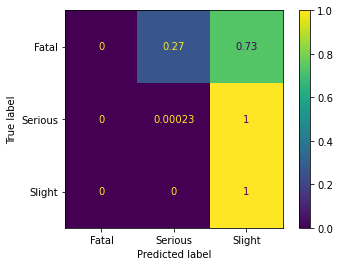

In [35]:
clf_cm = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
#gnb_roc = plot_roc_curve(gnb, x_test, y_test, multi_class='ovr')
clf_confusion_matrix = plot_confusion_matrix(clf, x_test, y_test, normalize='true')

In [ ]:
#Multinomial distribution has lower accuracy but Gaussian 
#tends to overfit
#Multinomial does not predict fatal accidents

In [36]:
d1=pd.DataFrame(y_pred)
d1.value_counts()

Slight     16566
Serious      133
dtype: int64

# Logistic Regression

In [37]:
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 500)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

#80% training set and 20% test set print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

In [38]:
alpha_values = [0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
C=[]
for i in alpha_values:
    C.append(1/i)
C

[100.0,
 50.0,
 25.0,
 12.5,
 6.25,
 3.125,
 1.5625,
 0.78125,
 0.390625,
 0.1953125,
 0.09765625]

In [60]:
lr_model = LogisticRegression()
#alpha_values = [0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
lr_params = {'C':C, 'penalty': ['l1', 'l2']}
lr_grid = GridSearchCV(lr_model, lr_params, cv=5)
lr_grid.fit(x_train, y_train)
lr_best = lr_grid.best_estimator_


In [61]:
lr_scores = cross_val_score(lr_best, x_train, y_train, cv=5)
lr_best.fit(x_train, y_train)
lr_pred = lr_best.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

In [62]:
lr_scores

array([1., 1., 1., 1., 1.])

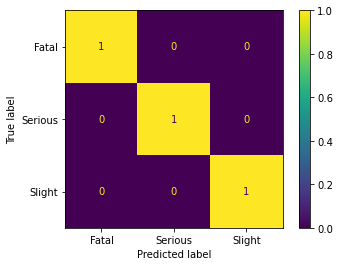

In [63]:
lr_report = classification_report(y_test, lr_pred)
#lr_roc = plot_roc_curve(lr_best, x_test, y_test, multi_class='ovr')
lr_confusion_matrix = plot_confusion_matrix(lr_best, x_test, y_test, normalize='true')

In [89]:

#y_pred = lr_model.predict(x_test)

In [65]:
#lr_scores = cross_val_score(lr_model, x_train, y_train, cv=5)
#print('Cross-Validation Accuracy Scores', scores)

In [67]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, lr_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 1.0


In [68]:
d1=pd.DataFrame(y_pred)
d1.value_counts()

Slight     16566
Serious      133
dtype: int64

# Neural Networks

In [53]:
clf = MLPClassifier(solver='adam', activation='relu' ,#alpha=0.1,
                    shuffle=True,
                    #verbose=True,
                    learning_rate_init=0.00001,early_stopping=True,
                     hidden_layer_sizes=(10, 7), random_state=42)



In [46]:
results = cross_validate(estimator=clf,
                               X=x_test,
                               y=y_test,
                               #cv=_cv,---> default is 5 K Fold
                               #scoring=_scoring,
                               return_train_score=True)

In [47]:
results

{'fit_time': array([4.20800519, 4.47585869, 3.73394823, 4.26924491, 4.47557211]),
 'score_time': array([0.01567936, 0.0140481 , 0.00790095, 0.01561928, 0.01562238]),
 'test_score': array([0.70988024, 0.70928144, 0.70928144, 0.70988024, 0.71069182]),
 'train_score': array([0.71000823, 0.71008309, 0.70985852, 0.70970881, 0.70973054])}

In [58]:
clf = MLPClassifier(solver='adam', activation='relu' ,#alpha=0.1,
                    shuffle=True,
                    verbose=True,
                    learning_rate_init=0.00001,
                    early_stopping=True,
                     hidden_layer_sizes=(10, 7),
                    random_state=42)

In [59]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
#score=clf.score()
#df_new.dtypes

Iteration 1, loss = 1.07056403
Validation score: 0.697754
Iteration 2, loss = 1.05170596
Validation score: 0.708982
Iteration 3, loss = 1.03433157
Validation score: 0.711826
Iteration 4, loss = 1.01814867
Validation score: 0.713024
Iteration 5, loss = 1.00294629
Validation score: 0.713323
Iteration 6, loss = 0.98858235
Validation score: 0.714072
Iteration 7, loss = 0.97493937
Validation score: 0.714521
Iteration 8, loss = 0.96192359
Validation score: 0.714671
Iteration 9, loss = 0.94944703
Validation score: 0.714820
Iteration 10, loss = 0.93744781
Validation score: 0.714820
Iteration 11, loss = 0.92585446
Validation score: 0.714820
Iteration 12, loss = 0.91463524
Validation score: 0.714820
Iteration 13, loss = 0.90376473
Validation score: 0.714820
Iteration 14, loss = 0.89321572
Validation score: 0.714820
Iteration 15, loss = 0.88298129
Validation score: 0.714820
Iteration 16, loss = 0.87304704
Validation score: 0.714820
Iteration 17, loss = 0.86339672
Validation score: 0.714820
Iterat

In [60]:
score=clf.score(x_test,y_test)
score

0.7102221689921552

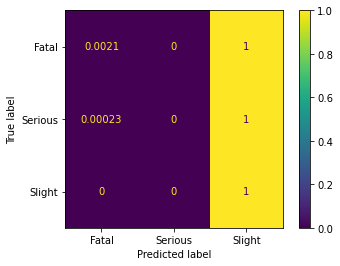

In [61]:
lr_confusion_matrix = plot_confusion_matrix(clf, x_test, y_test, normalize='true')